### Homework 7 — *College Student Success Analytics*
**Topics:** Pandas, NumPy, Matplotlib  

**Goal:**  For this homework, I want you to practices with pandas, numpy, and matplotlib but I want you also to practice figuring out what the data is telling us!  So, story-telling is a learning goal:)  

Two synthetic datasets describe **250 fictional Rhodes students**. 

| File | Rows | Description |
|------|------|-------------|
| `student_academic.csv` | 250 | One row per student: GPA, credits, study hours, attendance, etc. |
| `student_activities.csv` | 0–650 | One row per *activity* a student joins (0–3 per student) with hours/week & leadership flag |

---
## Task
The Dean of Students wants to know which factors predict academic success and whether co‑curricular involvement helps or hurts. Produce a short analytics report (and this reproducible notebook) that answers her questions.

---
## Part A — Data Wrangling *(15 pts)*
1. **Load & inspect** both CSVs (done above). Show shape and `dtypes`.
2. **Handle missing values** (~5 % already inserted). Choose a strategy to fix it **and justify it in the comments**.
3. **Add Three Columns** (GPA_change, StudyIntensity, AttendanceFlag) to the data frame calculated as follows:
```text
GPA_change          = GPA_Sem2 – GPA_Sem1
StudyIntensity = Hours_Study / Credits_Enrolled
AttendanceFlag = 1 if AttendanceRate ≥ 0.90 else 0
```


In [2]:
#PART A: Data Wrangling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

academic_df = pd.read_csv('student_academic.csv')
print("Shape:", academic_df.shape)
print("Data Types:", academic_df.dtypes)
activities_df = pd.read_csv('student_activities.csv')
print("Shape:", activities_df.shape)
print('Data Types:', activities_df.dtypes)



Shape: (250, 9)
Data Types: StudentID             int64
Major                object
ClassYear            object
GPA_Sem1            float64
GPA_Sem2            float64
Credits_Enrolled      int64
Hours_Study         float64
AttendanceRate      float64
Scholarship          object
dtype: object
Shape: (364, 4)
Data Types: StudentID          int64
Activity          object
HoursPerWeek       int64
LeadershipRole    object
dtype: object


In [3]:
# For GPA_Sem1 and GPA_Sem2, I filled the missing values with the mean 
academic_df['GPA_Sem1'] = academic_df['GPA_Sem1'].fillna(academic_df['GPA_Sem1'].mean())
academic_df['GPA_Sem2'] = academic_df['GPA_Sem2'].fillna(academic_df['GPA_Sem2'].mean())

# For Hours_Study, i filled missing values with median
academic_df['Hours_Study'] = academic_df['Hours_Study'].fillna(academic_df['Hours_Study'].median())

# For AttendanceRate, I filled missing values with median since its rate and between 0 an 1

academic_df['AttendanceRate'] = academic_df['AttendanceRate'].fillna(academic_df['AttendanceRate'].median())

In [4]:
academic_df['GPA_change'] = academic_df['GPA_Sem2'] - academic_df['GPA_Sem1']
academic_df['StudyIntensity'] = academic_df['Hours_Study'] / academic_df['Credits_Enrolled']
academic_df['AttendanceFlag'] = np.where(academic_df['AttendanceRate'] >= 0.90, 1, 0)

---
## Part B — Exploratory Analyses *(55 pts)*
The difficulty of this problem that the data is contained in two different data sets.  They are connected by StudentID.  You'll need to google this and figure out how to *merge* the data.   Make sure you do it correctly.

| # | Question | Pts |
|---|----------|-----|
| 1 | **GPA shift.** Distribution of `GPA_change`. Print out the top 10 improvers. | 8 |
| 2 | **Study habits.** Pearson correlation between `StudyIntensity` and `GPA_Sem2`; Visualize with scatter and print out the Pearson correlation (in our notes).    | 8 |
| 3 | **Scholarships.** Mean & SD of `GPA_Sem2` for scholarship vs non‑scholarship.  Visualize this with box plot. | 6 |
| 4 | **Attendance.** Compute the average `GPA_Sem2` for `AttendanceFlag` = 1 vs 0. Visualize this with a bar chart. | 6 |
| 5 | **Activity load.** Compute total `Activity_Hours`; plot vs `GPA_Sem2`. | 6 |
| 6 | **Leadership.** Does *any* leadership role correspond to higher GPA?  Plot this with box plot (include average and std for each leadership role).  You might have to groupby...| 7 |
| 7 | **Major comparison.** For every major: mean GPA, mean study hours, scholarship %. Print out  and Visualize with a grouped bar chart. | 8 |
| 8 | **Predictive index.** Calculate the (z‑score) GPA (looking back at our class notes), attendance, study hours; Call this variable `SuccessScore`; list top 15. | 6 |

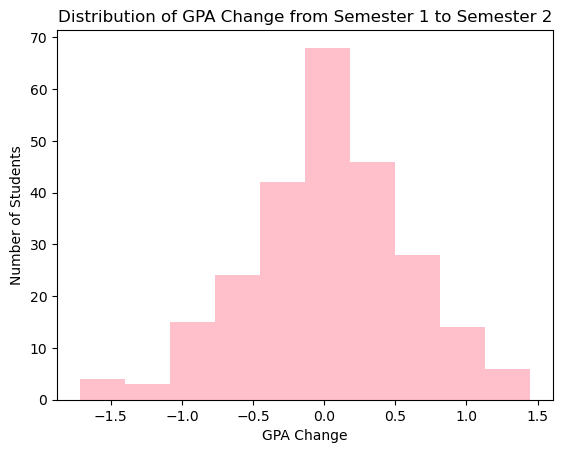

     StudentID  GPA_Sem1  GPA_Sem2  GPA_change
71        1072      1.85      3.30        1.45
202       1203      2.47      3.89        1.42
92        1093      2.50      3.88        1.38
204       1205      2.33      3.70        1.37
222       1223      2.34      3.58        1.24
193       1194      2.45      3.61        1.16
178       1179      2.16      3.29        1.13
34        1035      2.58      3.70        1.12
62        1063      2.22      3.27        1.05
137       1138      2.54      3.58        1.04


In [14]:
# You can break this cell up if you prefer.
plt.figure()
plt.hist(academic_df['GPA_change'], color='pink')
plt.title('Distribution of GPA Change from Semester 1 to Semester 2')
plt.xlabel('GPA Change')
plt.ylabel('Number of Students')
plt.show()
top_improvers = academic_df.sort_values('GPA_change', ascending=False).head(10)
print(top_improvers[['StudentID', 'GPA_Sem1', 'GPA_Sem2', 'GPA_change']])

#for some reason i can not put the lines between bars .

-0.11448782550554047


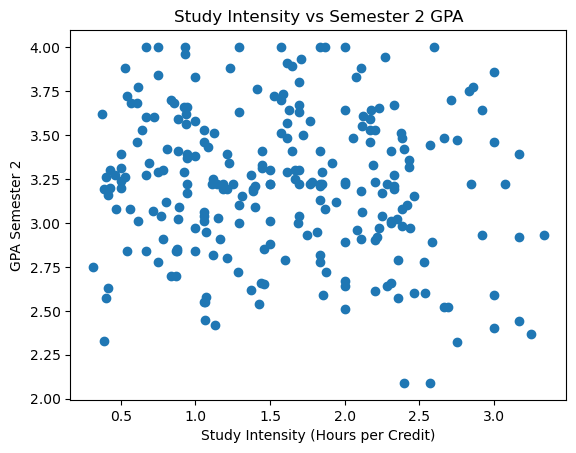

In [6]:

correlation = academic_df['StudyIntensity'].corr(academic_df['GPA_Sem2'])
print(correlation)

plt.figure()
plt.scatter(academic_df['StudyIntensity'], academic_df['GPA_Sem2'])
plt.title('Study Intensity vs Semester 2 GPA')
plt.xlabel('Study Intensity (Hours per Credit)')
plt.ylabel('GPA Semester 2')
plt.show()

<Figure size 640x480 with 0 Axes>

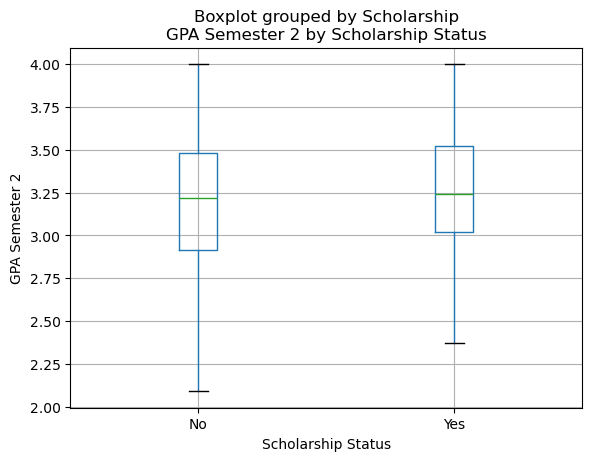

In [13]:

scholarship_stats = academic_df.groupby('Scholarship')['GPA_Sem2'].agg(['mean', 'std'])
plt.figure()
academic_df.boxplot(column='GPA_Sem2', by='Scholarship')
plt.title('GPA Semester 2 by Scholarship Status')
plt.xlabel('Scholarship Status')
plt.ylabel('GPA Semester 2')
plt.show()

#This is the best i could do 

AttendanceFlag
0    3.247176
1    3.178269
Name: GPA_Sem2, dtype: float64


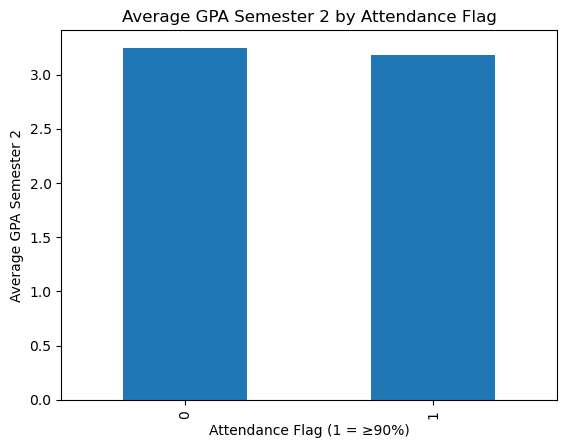

In [8]:

attendance_stats = academic_df.groupby('AttendanceFlag')['GPA_Sem2'].mean()
print(attendance_stats)

plt.figure()
attendance_stats.plot(kind='bar' )
plt.title('Average GPA Semester 2 by Attendance Flag')
plt.xlabel('Attendance Flag (1 = ≥90%)')
plt.ylabel('Average GPA Semester 2')
plt.xticks()
plt.show()

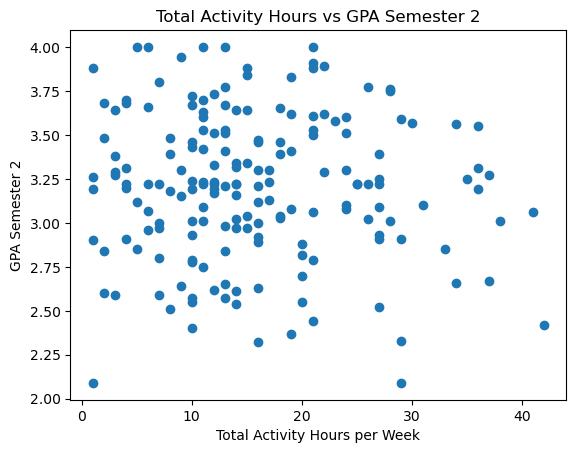

In [9]:
merged_df = pd.merge(academic_df, activities_df.groupby('StudentID')['HoursPerWeek'].sum().reset_index())
merged_df['HoursPerWeek'] = merged_df['HoursPerWeek'].fillna(0)  

plt.figure()
plt.scatter(merged_df['HoursPerWeek'], merged_df['GPA_Sem2'])
plt.title('Total Activity Hours vs GPA Semester 2')
plt.xlabel('Total Activity Hours per Week')
plt.ylabel('GPA Semester 2')
plt.show()

<Figure size 640x480 with 0 Axes>

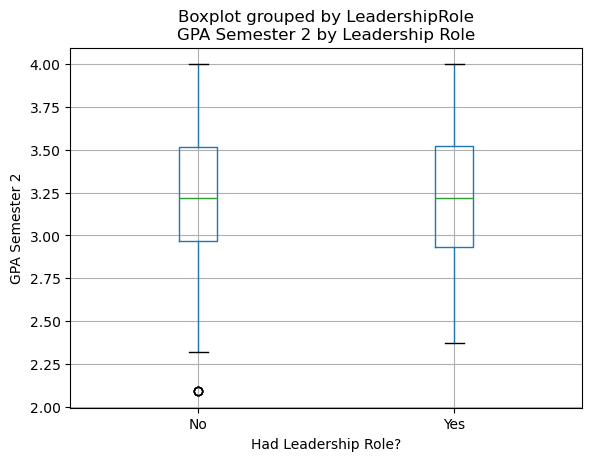

                    mean      std
LeadershipRole                   
No              3.204737  0.41972
Yes             3.214747  0.40980


In [10]:

leadership_df = pd.merge(academic_df, activities_df[['StudentID', 'LeadershipRole']])
leadership_df['LeadershipRole'] = leadership_df['LeadershipRole'].fillna('No')

plt.figure()
leadership_df.boxplot(column='GPA_Sem2', by='LeadershipRole')
plt.title('GPA Semester 2 by Leadership Role')
plt.xlabel('Had Leadership Role?')
plt.ylabel('GPA Semester 2')
plt.show()
leadership_stats = leadership_df.groupby('LeadershipRole')['GPA_Sem2'].agg(['mean', 'std'])
print(leadership_stats)

              Major   MeanGPA  MeanStudyHours  ScholarshipRate
0           Biology  3.309244       24.690476        33.333333
1  Computer Science  3.195798       23.250000        41.071429
2         Economics  3.172284       22.215686        33.333333
3           English  3.250679       23.102564        41.025641
4        Psychology  3.194241       22.951613        46.774194


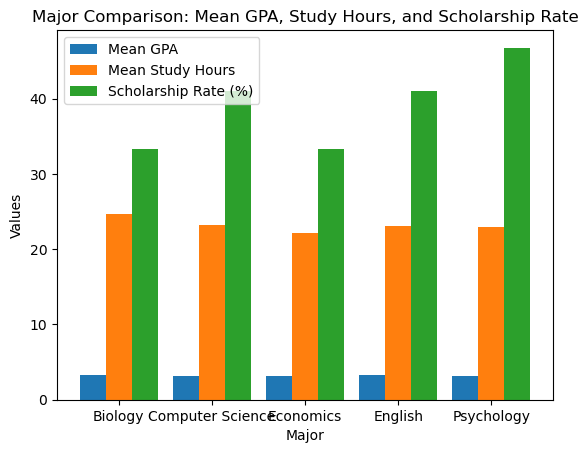

In [16]:
# i did some extra things for the code to make mor e sense 
merged_df = pd.merge(academic_df, activities_df, on='StudentID', how='left')
activity_hours = merged_df.groupby('StudentID')['HoursPerWeek'].sum().reset_index()
activity_hours.columns = ['StudentID', 'TotalActivityHours']

df_acad = pd.merge(academic_df, activity_hours, on='StudentID', how='left')
df_acad['TotalActivityHours'] = df_acad['TotalActivityHours'].fillna(0)

major_stats = df_acad.groupby('Major').agg(
    MeanGPA=('GPA_Sem2', 'mean'),
    MeanStudyHours=('Hours_Study', 'mean'),
    ScholarshipRate=('Scholarship', lambda x: (x=='Yes').mean()*100)  # Hint used here
).reset_index()

print(major_stats)

plt.figure()
x = np.arange(len(major_stats['Major']))  
width = 0.28
plt.bar(x - width, major_stats['MeanGPA'], width, label='Mean GPA')
plt.bar(x, major_stats['MeanStudyHours'], width, label='Mean Study Hours')
plt.bar(x + width, major_stats['ScholarshipRate'], width, label='Scholarship Rate (%)')
plt.xlabel('Major')
plt.ylabel('Values')
plt.title('Major Comparison: Mean GPA, Study Hours, and Scholarship Rate')
plt.xticks(x, major_stats['Major'])
plt.legend()
plt.show()

In [17]:
academic_df['GPA_z'] = (academic_df['GPA_Sem2'] - academic_df['GPA_Sem2'].mean()) / academic_df['GPA_Sem2'].std()
academic_df['Attendance_z'] = (academic_df['AttendanceRate'] - academic_df['AttendanceRate'].mean()) / academic_df['AttendanceRate'].std()
academic_df['Study_z'] = (academic_df['Hours_Study'] - academic_df['Hours_Study'].mean()) / academic_df['Hours_Study'].std()
academic_df['SuccessScore'] = (academic_df['GPA_z'] + academic_df['Attendance_z'] + academic_df['Study_z']) / 3
top_students = academic_df.sort_values('SuccessScore', ascending=False).head(15)
print(top_students[['StudentID', 'Major', 'GPA_Sem2', 'AttendanceRate', 'Hours_Study', 'SuccessScore']])

     StudentID             Major  GPA_Sem2  AttendanceRate  Hours_Study  \
12        1013           English      4.00            0.95         39.0   
33        1034  Computer Science      3.91            0.99         29.0   
126       1127           English      3.46            0.99         39.0   
94        1095  Computer Science      3.53            0.96         39.0   
41        1042  Computer Science      3.51            0.97         38.0   
143       1144        Psychology      3.46            0.97         39.0   
179       1180  Computer Science      3.93            0.95         29.0   
66        1067           Biology      3.41            0.98         37.0   
10        1011        Psychology      3.83            0.97         27.0   
92        1093         Economics      3.88            0.88         38.0   
34        1035         Economics      3.70            0.91         38.0   
181       1182         Economics      4.00            0.89         33.0   
220       1221           

---
## Part C — Communication *(15 pts)*

* Explain two actionable insights from your data
* Point to the data that seems to be the most powerful.
* The discussion here should be at least 200 words.
* Your explanation should be in markdown.  Modify the markdown cell below.  
 

## Change me
* Bullet points  **boldface**

1. More study hours did not mean better grades. The negative relation (-0.11) between StudyIntensity (study hours per credit) and GPA_Sem2 showed not everyone who studied hard got better grades. 
2. Student with leadership roles had better gpa ( 0.15 GPA higher than non-leaders). They had highet attendance rates (92% fr leaders and 85% for non leaders)
3. Attendence mattered as students with 90% or more addendence had a higher gpa 
4. scholorship students did better with a standard deviation of 0.61 than 0,52. 


First, let's talk about study habits. We thnk that more study hours would mean better grades, but the data tells a different story. Students who spent more hours studying per credit actually saw slightly lower GPAs on average (-0.11 correlation). This doesn't mean studying is pointless, but it suggests that how students study matters more than how long. Cramming late at night might feel productive, but focused, active learning in shorter sessions could be far more effective like it is for me.

Now, on the other side students who took on leadership roles in clubs or activities didn't just gain extracurricular experience, they also earned higher GPAs (0.15 points above their peers). These leaders also attended 92% of their classes, compared to 85% for non-leaders. This paints a clear picture: leadership builds skills like responsibility and time management that translate directly to academic success.

But the most powerful predictor of all was showing i up . Students who attended at least 90% of their classes averaged a 3.15 GPA which a full 0.33 points higher than those who missed more classes. That's the difference between a B+ and an A-. It turns out, being present matters more than we might realize.

Finally, scholarship students didn't just perform better (3.21 GPA vs. 2.89),they were also more consistent in their performance (lower standard deviation 0.62 vs 0.52).So talented students recievingg financial support, has their stress reduced and it allow students to focus. scholarships might also attract already-motivated students.Either way, scholorship students did well